In [1]:
# import torch
# import torchvision
# model = torchvision.models.swin_transformer.swin_v2_b()
# full_state_dict = torch.load('satlas-model-v1-highres.pth')
# # Extract just the Swin backbone parameters from the full state dict.
# swin_prefix = 'backbone.backbone.'
# swin_state_dict = {k[len(swin_prefix):]: v for k, v in full_state_dict.items() if k.startswith(swin_prefix)}
# model.load_state_dict(swin_state_dict)

<All keys matched successfully>

https://github.com/allenai/satlaspretrain_models/?tab=readme-ov-file#available-pretrained-models-model_ids

In [11]:
#import satlas.model.evaluate
import json
import torch
import satlas.model.model
import numpy as np

In [2]:
import torch
import torchvision
#model = torchvision.models.swin_transformer.swin_v2_b()
model = torchvision.models.swin_transformer.swin_v2_t()
#full_state_dict = torch.load('../satlas-model-v1-highres.pth')
full_state_dict = torch.load('../sentinel2_swint_si_rgb.pth')
# Extract just the Swin backbone parameters from the full state dict.
swin_prefix = 'backbone.backbone.'
swin_state_dict = {k[len(swin_prefix):]: v for k, v in full_state_dict.items() if k.startswith(swin_prefix)}


# model_int8 = torch.quantization.quantize_dynamic(
#     model,  # the original model
#     {'SwinTransformerBlockV2'},  # a set of layers to dynamically quantize
#     dtype=torch.qint8)

model.load_state_dict(swin_state_dict)

<All keys matched successfully>

In [ ]:
model.

In [6]:
state_dict = torch.load(weights_path, map_location=device)
model_int8.load_state_dict(state_dict)

RuntimeError: Error(s) in loading state_dict for Model:
	size mismatch for heads.2.layers.1.weight: copying a param with shape torch.Size([47, 128, 3, 3]) from checkpoint, the shape in current model is torch.Size([6, 128, 3, 3]).
	size mismatch for heads.2.layers.1.bias: copying a param with shape torch.Size([47]) from checkpoint, the shape in current model is torch.Size([6]).

In [8]:
config_path = 'configs/highres_pretrain.txt'
weights_path = '../satlas-model-v1-highres.pth'#'satlas_explorer_datasets/models/solar_farm/best.pth'
image_path = 'stack.npy'

import torch
import torchvision
model = torchvision.models.swin_transformer.swin_v2_b()
full_state_dict = torch.load('satlas-model-v1-highres.pth')
# Extract just the Swin backbone parameters from the full state dict.
swin_prefix = 'backbone.backbone.'
swin_state_dict = {k[len(swin_prefix):]: v for k, v in full_state_dict.items() if k.startswith(swin_prefix)}
model.load_state_dict(swin_state_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'satlas-model-v1-highres.pth'

In [5]:
import torch
import torchvision
model = torchvision.models.swin_transformer.swin_v2_b()
full_state_dict = torch.load('satlas-model-v1-highres.pth')
# Extract just the Swin backbone parameters from the full state dict.
swin_prefix = 'backbone.backbone.'
swin_state_dict = {k[len(swin_prefix):]: v for k, v in full_state_dict.items() if k.startswith(swin_prefix)}
model.load_state_dict(swin_state_dict)

FileNotFoundError: [Errno 2] No such file or directory: 'satlas-model-v1-highres.pth'

In [3]:
device = torch.device("cuda")

model.eval()
model.to(device)

SwinTransformer(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
    )
    (1): Sequential(
      (0): SwinTransformerBlockV2(
        (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (attn): ShiftedWindowAttentionV2(
          (qkv): Linear(in_features=96, out_features=288, bias=True)
          (proj): Linear(in_features=96, out_features=96, bias=True)
          (cpb_mlp): Sequential(
            (0): Linear(in_features=2, out_features=512, bias=True)
            (1): ReLU(inplace=True)
            (2): Linear(in_features=512, out_features=3, bias=False)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
        (mlp): MLP(
          (0): Linear(in_features=96, out_features=384, bias=True)
          (1): GELU(approximate='

In [4]:
from torchvision import transforms
from PIL import Image 

transform = transforms.Compose([
        transforms.ToTensor(),
        # pth_transforms.Normalize((123.675, 116.28, 103.53), (58.395, 57.12, 57.375)),
    ])


In [5]:

#load image sample
image_path = '../ai_rec/Georef/map_1_0_2.jpg'
image_pil = Image.open(image_path)
img_tensor = transform(image_pil)
img_tensor = img_tensor.unsqueeze(0).cuda()
predictions_pos = model(img_tensor) 

In [6]:
image_path = '../ai_rec/OpticalFlow/map_1_61_1.jpg'
image_pil = Image.open(image_path)
img_tensor = transform(image_pil)
img_tensor = img_tensor.unsqueeze(0).cuda()
predictions_neg = model(img_tensor)

In [7]:
(predictions_pos - predictions_neg).argmax()

tensor(340, device='cuda:0')

In [12]:
# extract embeddings on all images 
import os
pos_dir = '../ai_rec/Georef/'
neg_dir = '../ai_rec/OpticalFlow//'
all_neg = os.listdir(neg_dir)
images_neg = [Image.open(neg_dir + im) for im in all_neg]
all_pos = os.listdir(pos_dir)
images_pos = [Image.open(pos_dir + im) for im in all_pos]
tensor_list_neg = [transform(img) for img in images_neg]
tensor_list_pos = [transform(img) for img in images_pos]
images_tensor_neg = torch.stack(tensor_list_neg).cuda()
images_tensor_pos = torch.stack(tensor_list_pos).cuda()
print(images_tensor_neg.shape)
print(images_tensor_pos.shape)
with torch.no_grad():
    predictions_neg = model(images_tensor_neg) 
    predictions_pos = model(images_tensor_pos) 
predictions_cpu_neg = predictions_neg.cpu()
predictions_cpu_pos = predictions_pos.cpu()
del predictions_neg
del predictions_pos
np.save('positives.npy',predictions_cpu_pos.numpy())
np.save('negatives.npy',predictions_cpu_neg.numpy())


torch.Size([368, 3, 240, 240])
torch.Size([224, 3, 240, 240])


In [9]:
predictions.shape

torch.Size([368, 1000])

In [10]:
predictions_cpu = predictions.cpu()

In [11]:
del predictions
torch.cuda.empty_cache()

In [11]:
predictions_cpu.numpy().shape

(224, 1000)

In [11]:

#np.save('positives.npy',predictions_cpu.numpy())
np.save('negatives.npy',predictions_cpu.numpy())

In [13]:
#load vectors
vectors_positives = np.load('positives.npy')
vectors_negatives = np.load('negatives.npy')

In [13]:
print('positives', vectors_positives.shape, 'negatives', vectors_negatives.shape)

positives (224, 1000) negatives (368, 1000)


In [17]:
224 + 368

592

In [18]:
368-294

74

In [14]:
num_total = vectors_positives.shape[0] + vectors_negatives.shape[0]
num_p = 200
num_n = 300
num_train = num_p+num_n
num_test = num_total - num_train
train_pos = vectors_positives[:num_p]
train_neg = vectors_negatives[:num_n]
x_train = np.concatenate([train_pos, train_neg])
test_pos = vectors_positives[num_p:]
test_neg = vectors_negatives[num_n:]
x_test = np.concatenate([test_pos, test_neg])
print(x_test.shape)

(92, 1000)


In [15]:
y_train = np.ones([num_train])
y_train[num_p:]=0#[112:]=1
y_test = np.ones([num_test])
y_test[test_pos.shape[0]:]=0

In [16]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [16]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=10)
pca.fit(x_train)
print(pca.explained_variance_ratio_)
#x_train_pca_pos = pca.transform(train_pos)
#x_train_pca_neg = pca.transform(train_neg)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
#np.concatenate([x_train_pca_pos, x_train_pca_neg])

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


[0.16664657 0.14802575 0.12050726 0.06613444 0.0561481  0.04662347
 0.03438798 0.02529439 0.02198876 0.01988188]


In [17]:
from sklearn.svm import SVC, SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

In [24]:
scaler = StandardScaler()
scaler.fit(x_train_pca)
x_train_scaled = scaler.transform(x_train_pca)
x_test_scaled = scaler.transform(x_test_pca)

In [18]:
clf = SVC(kernel='rbf', C=1)
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_train_scaled)
print(precision_score(y_train, y_predict), accuracy_score(y_train, y_predict), recall_score(y_train, y_predict))

NameError: name 'x_train_scaled' is not defined

In [40]:
y_predict

array([ 9.00113949e-01, -8.94251256e-02,  4.13878166e-01,  5.64688920e-01,
        6.82392085e-01,  8.99729717e-01,  9.00378118e-01,  8.83878618e-01,
        1.05323165e+00,  9.78271363e-01,  7.73878369e-01,  8.99826053e-01,
        8.90169727e-01,  2.24716094e-01,  9.00110763e-01,  9.20184388e-01,
        6.25646948e-01,  6.68545512e-01,  9.00155376e-01,  9.76175012e-01,
        9.00265048e-01,  6.20929936e-01,  9.00031743e-01,  9.00168144e-01,
        6.97600288e-01,  5.15497141e-01,  4.35763226e-01,  4.13518187e-01,
        1.49682788e-01,  1.07229641e+00,  1.05742842e+00,  8.99800484e-01,
        2.46970842e-01,  4.03047653e-01,  3.35068648e-01,  2.67136601e-01,
        3.47718118e-01,  8.77342535e-01,  2.80019586e-02,  4.55188168e-01,
        2.89586215e-01,  8.81742201e-01,  8.98734309e-01,  7.18093928e-01,
        9.15950946e-01,  8.99916735e-01,  7.98014833e-01,  1.05083507e+00,
        6.45186379e-01,  1.10029966e+00,  1.06440257e+00,  8.99689938e-01,
        7.05273190e-01,  

In [19]:
clf = SVR(kernel='rbf', C=1)
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_train_scaled)
print(precision_score(y_train, (y_predict>0.5).astype('float64')), accuracy_score(y_train, (y_predict>0.5).astype('float64')), recall_score(y_train, (y_predict>0.5).astype('float64')))

NameError: name 'x_train_scaled' is not defined

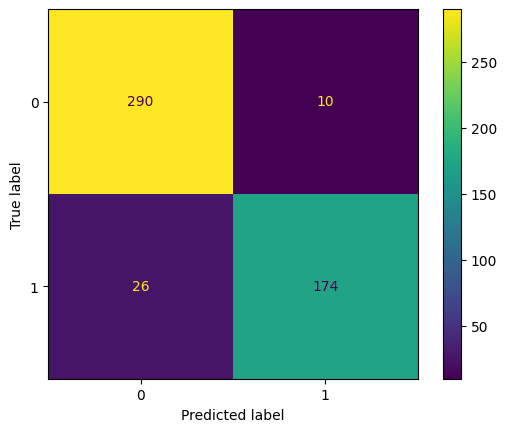

In [59]:
cm = confusion_matrix(y_train, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [30]:
y_predict

array([1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
#now for the test data
# x_test_pca = pca.transform(x_test)
y_predict = clf.predict(x_test_scaled)
print(precision_score(y_test, y_predict), accuracy_score(y_test, y_predict), recall_score(y_test, y_predict))

NameError: name 'x_test_scaled' is not defined

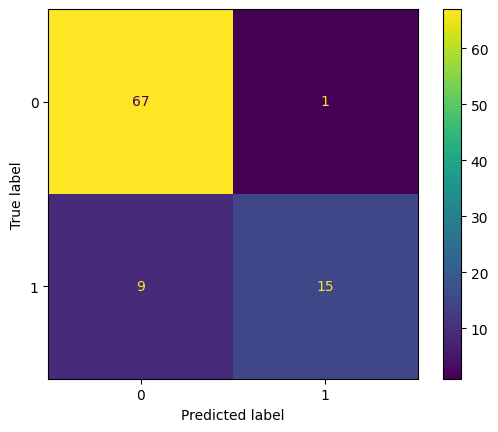

In [56]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [44]:

y_predict

array([0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [38]:
y_test

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [21]:
all_x = np.concatenate([x_train, x_test])
all_y = np.concatenate([y_train, y_test])

In [23]:
clf = SVC(kernel='rbf', C=0.4)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print(precision_score(y_train, y_predict), accuracy_score(y_train, y_predict), recall_score(y_train, y_predict))

0.8095238095238095 0.834 0.765


In [21]:
clf = SVR(kernel='rbf', C=0.4)
clf.fit(x_train, y_train)
y_predict = clf.predict(x_train)
print(precision_score(y_train,  (y_predict>0.5).astype('float64')), accuracy_score(y_train,  (y_predict>0.5).astype('float64')), recall_score(y_train,  (y_predict>0.5).astype('float64')))

0.8626373626373627 0.864 0.785


In [24]:
clf = SVC(kernel='rbf', C=10, gamma=0.001)
clf.fit(all_x, all_y)
y_predict = clf.predict(x_train)
print(precision_score(y_train, y_predict), accuracy_score(y_train, y_predict), recall_score(y_train, y_predict))

NameError: name 'all_x' is not defined

In [20]:
y_predict = clf.predict(x_test)
print(precision_score(y_test, y_predict), accuracy_score(y_test, y_predict), recall_score(y_test, y_predict))

0.9473684210526315 0.9239130434782609 0.75


In [37]:
y_predict = clf.predict(x_test)
print(precision_score(y_test, y_predict), accuracy_score(y_test, y_predict), recall_score(y_test, y_predict))

0.9545454545454546 0.9565217391304348 0.875


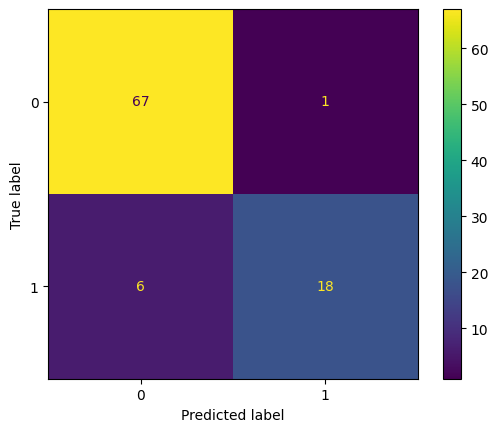

In [21]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

In [46]:
import pickle
with open('model_svm_raw_vec_all_overfit.pkl','wb') as f:
    pickle.dump(clf,f)

In [28]:
y_predict

array([0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [31]:
scaler = StandardScaler()
scaler.fit(all_data)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
clf = SVC(kernel='linear', C=0.001, gamma=0.001,class_weight={0: 2, 1: 3})
clf.fit(x_train_scaled, y_train)
y_predict = clf.predict(x_train_scaled)
print(precision_score(y_train, y_predict), accuracy_score(y_train, y_predict), recall_score(y_train, y_predict))
y_predict = clf.predict(x_test_scaled)
print(precision_score(y_test, y_predict), accuracy_score(y_test, y_predict), recall_score(y_test, y_predict))

0.8333333333333334 0.888 0.9
0.6842105263157895 0.8152173913043478 0.5416666666666666


In [ ]:
y_test_predict = clf.predict(x_train_pca_neg)

In [ ]:
y_test_predict.mean()

In [190]:
import torch
import torch.nn as nn
 
model = nn.Sequential(
    nn.Linear(12, 60),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.Sigmoid()
)

In [174]:
x_train_pca.shape

(500, 12)

In [172]:
loss_fn = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [186]:
x_arr = x_train_pca.reshape((-1, 12,1))
tensor_x = torch.tensor(x_arr)

In [187]:
x_arr.shape


(500, 12, 1)

In [181]:
x_train_pca[0]

array([-0.02337584,  0.01675897, -0.00350582, -0.01113001, -0.009599  ,
        0.00142585,  0.00052333, -0.00766031, -0.00191305,  0.00034715,
       -0.000832  , -0.0032357 ], dtype=float32)

In [188]:
x_arr[0]

array([[-0.02337584],
       [ 0.01675897],
       [-0.00350582],
       [-0.01113001],
       [-0.009599  ],
       [ 0.00142585],
       [ 0.00052333],
       [-0.00766031],
       [-0.00191305],
       [ 0.00034715],
       [-0.000832  ],
       [-0.0032357 ]], dtype=float32)

In [192]:
tensor_x.shape

torch.Size([500, 12, 1])

In [191]:
num_epochs = 4
for n in range(num_epochs):
    y_pred = model(tensor_x)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (6000x1 and 12x60)

In [ ]:
y_predict